In [105]:
!pip install folium

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from IPython.display import HTML
%matplotlib inline

from sklearn.impute import SimpleImputer


In [112]:
df=pd.read_csv("zomato_delivery.csv")
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


# EDA

In [113]:
df.shape

(45584, 20)

In [114]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [116]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [117]:
print("unique cities:",df.City.unique())
print("type of order:",df.Type_of_order.unique())
print("type of order:",df.multiple_deliveries.unique())
print("Road_traffic_density:",df.Road_traffic_density.unique())

unique cities: ['Metropolitian' 'Urban' 'Semi-Urban' nan]
type of order: ['Snack' 'Meal' 'Drinks' 'Buffet']
type of order: [ 3.  1.  0. nan  2.]
Road_traffic_density: ['Jam' 'High' 'Medium' 'Low' nan]


In [118]:
unique_values_per_feature = {}

for column in df.columns:
    unique_values_per_feature[column] = df[column].unique()

# Print or use the unique values
for column, values in unique_values_per_feature.items():
    print(f"Unique values for {column}:\n{values}\n")

Unique values for ID:
['0xcdcd' '0xd987' '0x2784' ... '0x4f8d' '0x5eee' '0x5fb2']

Unique values for Delivery_person_ID:
['DEHRES17DEL01' 'KOCRES16DEL01' 'PUNERES13DEL03' ... 'KOCRES04DEL01'
 'BHPRES06DEL03' 'GOARES03DEL03']

Unique values for Delivery_person_Age:
[36. 21. 23. 34. 24. 29. 35. 33. 25. 31. 37. 27. 32. 26. 38. 20. 22. nan
 28. 39. 30. 15. 50.]

Unique values for Delivery_person_Ratings:
[4.2 4.7 4.3 4.5 4.  4.9 4.1 5.  4.8 3.5 4.6 nan 4.4 3.8 3.9 3.7 2.6 2.5
 3.6 3.1 2.7 1.  3.2 3.3 6.  3.4 2.8 2.9 3. ]

Unique values for Restaurant_latitude:
[ 30.327968  10.003064  18.56245   30.899584  26.463504  19.176269
  12.311072  18.592718  17.426228  22.552672  18.563934  23.357804
  11.003669  12.986047  19.221315  13.005801  26.849596  21.160522
  12.934179  18.51421   11.022477  21.160437  15.51315   15.561295
   0.        18.55144   18.593481  21.173343  17.451976  12.972532
  13.064181  19.121999  21.149569  19.091458  22.539129  12.970324
  21.175975  23.369746  12.914264  

# Data Preprocessing

In [119]:
# Calculate preparation time directly without modifying the DataFrame
df['Preparation_Time'] = (pd.to_datetime(df['Time_Order_picked'], format='%H:%M', errors='coerce') - 
                          pd.to_datetime(df['Time_Orderd'], format='%H:%M', errors='coerce')).dt.total_seconds() / 60

df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Preparation_Time
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,...,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,15.0
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,...,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,10.0
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,...,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,10.0
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,...,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,10.0
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,...,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,15.0


In [120]:
#REPLACE NAN VALUE IN DELIVERY PERSON AGE,RATING WITH MEAN VALUE
df['Delivery_person_Age'].fillna(df['Delivery_person_Age'].mean(), inplace=True)
df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].mean(), inplace=True)

# Convert 'Order_Date' and 'Time_Orderd' to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d-%m-%Y', errors='coerce')
print(df[['Order_Date']].head())

# Print the updated unique values
print("new Unique values for Delivery_person_Age:")
print(df['Delivery_person_Age'].unique())

print("\n new Unique values for Delivery_person_Ratings:")
print(df['Delivery_person_Ratings'].unique())

  Order_Date
0 2022-02-12
1 2022-02-13
2 2022-03-04
3 2022-02-13
4 2022-02-14
new Unique values for Delivery_person_Age:
[36.         21.         23.         34.         24.         29.
 35.         33.         25.         31.         37.         27.
 32.         26.         38.         20.         22.         29.56691059
 28.         39.         30.         15.         50.        ]

 new Unique values for Delivery_person_Ratings:
[4.2       4.7       4.3       4.5       4.        4.9       4.1
 5.        4.8       3.5       4.6       4.6337737 4.4       3.8
 3.9       3.7       2.6       2.5       3.6       3.1       2.7
 1.        3.2       3.3       6.        3.4       2.8       2.9
 3.       ]


In [121]:
df["Time_Orderd"].head()

0    21:55
1    14:55
2    17:30
3    09:20
4    19:50
Name: Time_Orderd, dtype: object

In [122]:
cat_vars=df.select_dtypes(include=["O"]).columns
cat_vars

Index(['ID', 'Delivery_person_ID', 'Time_Orderd', 'Time_Order_picked',
       'Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')

In [123]:
num_vars=df.select_dtypes(include=["int64","float64"]).columns
num_vars

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)', 'Preparation_Time'],
      dtype='object')

In [124]:
imputer_mean = SimpleImputer(strategy='mean')

In [125]:
imputer_mean.fit(df[num_vars])

SimpleImputer()

In [126]:
df[num_vars] = imputer_mean.transform(df[num_vars])

In [127]:
imputer_mode = SimpleImputer(strategy='most_frequent')

In [128]:
df[cat_vars] = imputer_mode.fit_transform(df[cat_vars])


In [129]:
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken (min)               0
Preparation_Time               0
dtype: int64

# Visualization

In [130]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Preparation_Time
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55,...,Fog,Jam,2.0,Snack,motorcycle,3.0,No,Metropolitian,46.0,15.0
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,...,Stormy,High,1.0,Meal,motorcycle,1.0,No,Metropolitian,23.0,10.0
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,17:30,...,Sandstorms,Medium,1.0,Drinks,scooter,1.0,No,Metropolitian,21.0,10.0
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,...,Sandstorms,Low,0.0,Buffet,motorcycle,0.0,No,Metropolitian,20.0,10.0
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,...,Fog,Jam,1.0,Snack,scooter,1.0,No,Metropolitian,41.0,15.0


In [131]:
cor =df.corr()
cor

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min),Preparation_Time
Delivery_person_Age,1.000000,-0.067909,-0.004201,-0.008604,0.002452,-0.000497,0.003030,0.112424,0.292886,-0.006548
Delivery_person_Ratings,-0.067909,1.000000,-0.007251,-0.013044,-0.010137,-0.013284,0.033129,-0.114325,-0.331137,0.004257
Restaurant_latitude,-0.004201,-0.007251,1.000000,0.661818,0.866369,0.602744,-0.033576,0.008001,0.013970,-0.006722
Restaurant_longitude,-0.008604,-0.013044,0.661818,1.000000,0.632335,0.915023,-0.038734,0.004386,0.007787,-0.006870
Delivery_location_latitude,0.002452,-0.010137,0.866369,0.632335,1.000000,0.690560,-0.001629,0.010207,0.014234,-0.009021
Delivery_location_longitude,-0.000497,-0.013284,0.602744,0.915023,0.690560,1.000000,-0.001946,0.004939,0.007590,-0.007447
Vehicle_condition,0.003030,0.033129,-0.033576,-0.038734,-0.001629,-0.001946,1.000000,-0.096211,-0.234456,0.005444
multiple_deliveries,0.112424,-0.114325,0.008001,0.004386,0.010207,0.004939,-0.096211,1.000000,0.382779,0.000318
Time_taken (min),0.292886,-0.331137,0.013970,0.007787,0.014234,0.007590,-0.234456,0.382779,1.000000,-0.001700
Preparation_Time,-0.006548,0.004257,-0.006722,-0.006870,-0.009021,-0.007447,0.005444,0.000318,-0.001700,1.000000


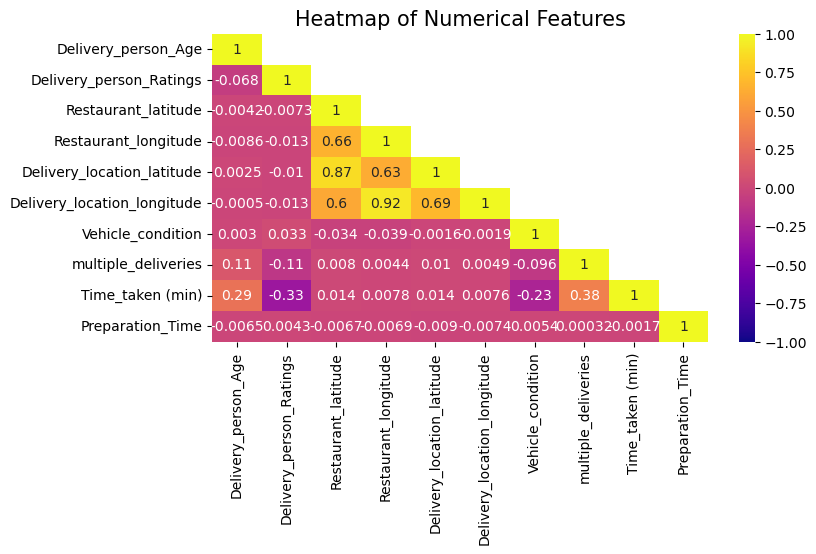

In [132]:
plt.figure(figsize=(8,4))
mask = np.triu(np.ones_like(cor, dtype=bool))
np.fill_diagonal(mask, False)
sns.heatmap(cor, annot=True, mask=mask, vmin=-1, vmax=1, cmap='plasma')
plt.title("Heatmap of Numerical Features", fontsize=15)
plt.show()

In [133]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Preparation_Time
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55,...,Fog,Jam,2.0,Snack,motorcycle,3.0,No,Metropolitian,46.0,15.0
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,...,Stormy,High,1.0,Meal,motorcycle,1.0,No,Metropolitian,23.0,10.0
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,17:30,...,Sandstorms,Medium,1.0,Drinks,scooter,1.0,No,Metropolitian,21.0,10.0
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,...,Sandstorms,Low,0.0,Buffet,motorcycle,0.0,No,Metropolitian,20.0,10.0
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,...,Fog,Jam,1.0,Snack,scooter,1.0,No,Metropolitian,41.0,15.0


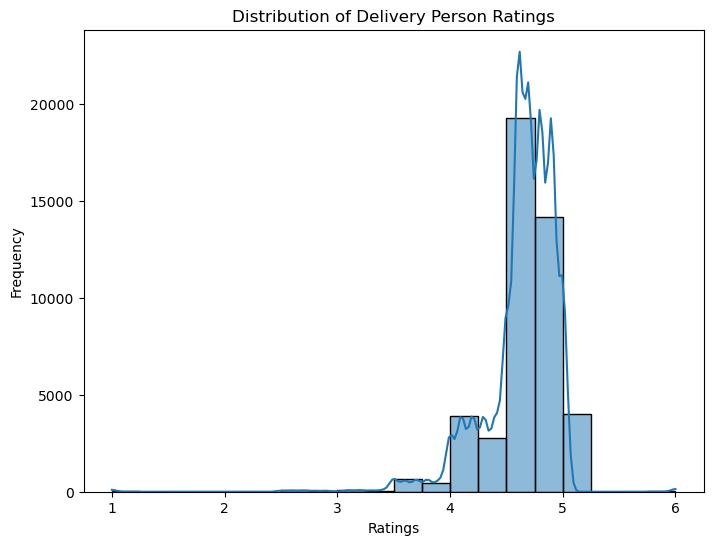

In [134]:
# Distribution of Delivery Person Ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['Delivery_person_Ratings'], bins=20, kde=True)
plt.title('Distribution of Delivery Person Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

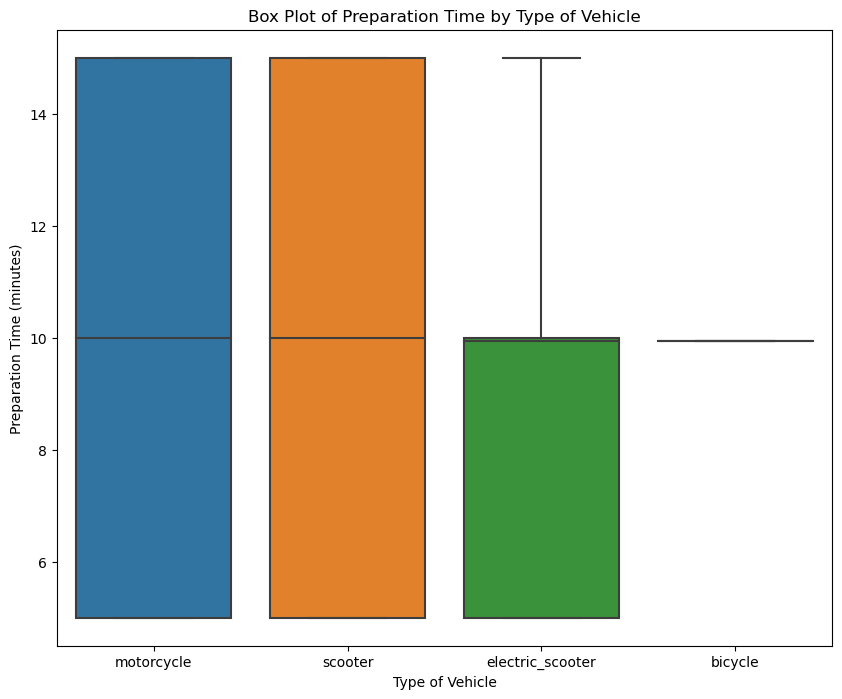

In [136]:
# Box plot of Preparation Time by Type of Vehicle
plt.figure(figsize=(10, 8))
sns.boxplot(x='Type_of_vehicle', y='Preparation_Time', data=df)
plt.title('Box Plot of Preparation Time by Type of Vehicle')
plt.xlabel('Type of Vehicle')
plt.ylabel('Preparation Time (minutes)')
plt.show()

# Warmer colors (e.g., red) represent areas with more deliveries, while cooler colors (e.g., blue) indicate fewer deliveries.

In [143]:
import folium
from folium.plugins import HeatMap

# Create a folium map centered around the average latitude and longitude
map_center = [df['Delivery_location_latitude'].mean(), df['Delivery_location_longitude'].mean()]
delivery_map = folium.Map(location=map_center, zoom_start=6)

# Create a HeatMap layer based on delivery locations
heat_data = [[row['Delivery_location_latitude'], row['Delivery_location_longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(delivery_map)

# Display the map in the Jupyter Notebook
delivery_map

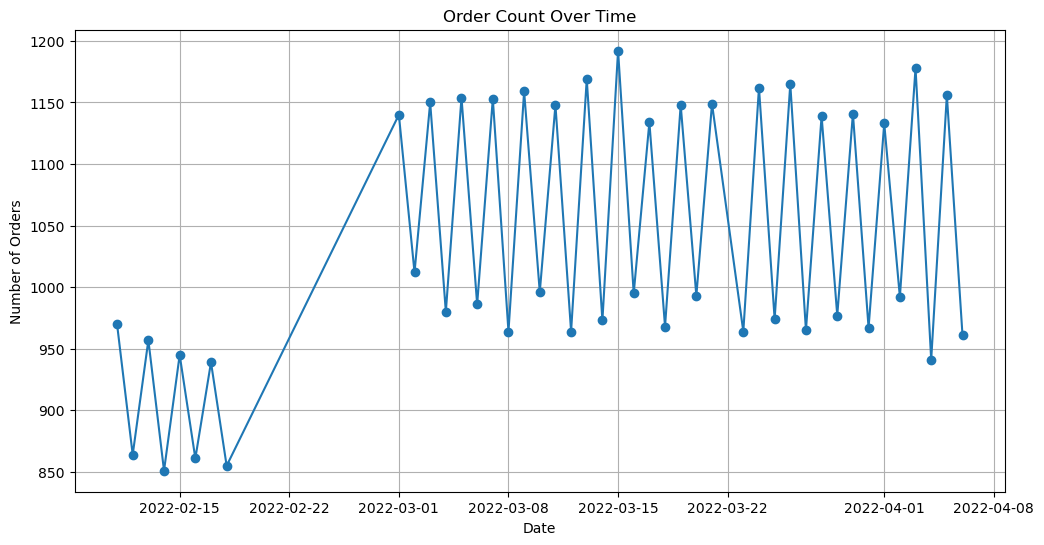

In [144]:
import matplotlib.pyplot as plt

# Group by Order Date and calculate the count of orders for each date
time_series_data = df.groupby('Order_Date').size().reset_index(name='Order_Count')

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['Order_Date'], time_series_data['Order_Count'], marker='o', linestyle='-')
plt.title('Order Count Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()


In [159]:
# Extract the year from 'Order_Date'
df['Year_of_Order'] = df['Order_Date'].dt.month
# print("unique Year_of_Order:",df.Order_Date.unique().count())
order_dates = df['Order_Date'].unique()
unique_order_count = len(order_dates)

print(f"Number of unique order dates: {unique_order_count}")


Number of unique order dates: 44


In [155]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Year_of_Order
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55,...,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,2
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,...,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,2
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,17:30,...,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,3
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,...,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,...,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,2
